### 차원축소 (Dimension Reductoion)
- 데이터가 가진 속성이 특성`feature`
- 이미지는 픽셀이 1000개가 있으면 특성이 1000개 인것
- 이런 특성을 차원이라고도 부름
- 데이터 분석때 `feature`가 많으면 데이터 분석이 어렵고 3개 이상(3차원)이상의 `feature`가 존재하면 시각화 어려움
- 머신러닝은 학습용 데이터의 `feature`가 많으면 연산량이 많아지고 학습을 위해서 더 많은 데이터가 필요함
- `feature`가 많음으로써 발생하는 문제를 차언의 저주라고 함 -> 차원의 수를 줄이는 차원축소를 거쳐야됨

### 주성분 분석(Principal Componet Analysis)
- 차우너축소 알고리즘
- 선형모델에서 특성이 많으면 성능이 높아지고 훈련 데이터셋에 오버피팅
- 차원 축소는 데이터를 가장 잘 나타내는 일부 특성을 선택하여 데이터 크기를 줄이고, 지도 학습 모델 성능 향상시키는 방법
- pca는 훈련데이터에 있는 분산이 큰 방향을 찾는것
- 직선이 원점에서 출발한다면 두 원소(2,1)로 이루어짐 벡터로 쓸 수 있음 - 이 벡터를 주성분이라고 부름- 원본 데이터에 있는 어떤 방향
- 샘플 데이터가 있는데 주성분에 직각으로 투영해 만들수있음 
- 주성분은 우너본 차원과 같고 주성분으로 바꾼 데이터는 차원이 줄어듬
- 일바넉으로 주성분은 원본 트성 수 만큼 찾을 수 있음
- 그러나 원본 만큼 찾으면 축소 효과가 없으므로 줄여서 찾음

In [2]:
# 클러스터별 이미지 출력
import matplotlib.pyplot as plt

# 함수 설정
def draw_fruits(arr, ratio=1):
  n = len(arr) # 샘플 개수
  rows = int(np.ceil(n/10)) # 샘플을 10개로 나눠서 행 개수 계산 -> 한줄에 10개씩 
  cols = n if rows < 2 else 10 # 행이 1개이면 열 개수는 샘플 개수 / 그렇지 않으면 10개

  fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)

  for i in range(rows): #행 만큼 돈다
    for j in range(cols):
      if i*10 + j < n: #n개 까지만 그림
        axs[i,j].imshow(arr[i*10 + j], cmap='gray_r')
      axs[i,j].axis('off')
  plt.show()

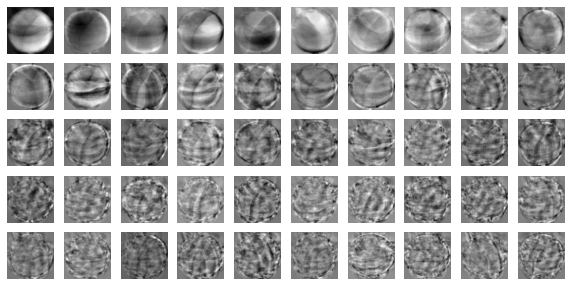

(300, 50)

In [3]:
import numpy as np
fruits = np.load("data/fruits_300.npy")
fruits_2d = fruits.reshape(-1, 100*100)

from sklearn.decomposition import PCA
pca = PCA(n_components=50) # 100*100 차원에서 주성분 개수 50개
pca.fit(fruits_2d)

# 주성분 크기
pca.components_.shape
pca.components_

# 주성분 2차원으로 변형
draw_fruits(pca.components_.reshape(-1,100,100))

# 원본 데이터 크기 (300, 10000)
fruits_2d.shape

# 원본 데이터 10000개 특성을 50개로 축소
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape # (300, 50)


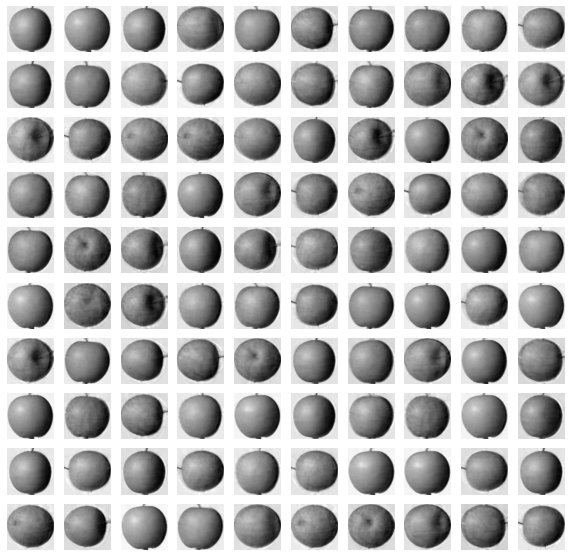

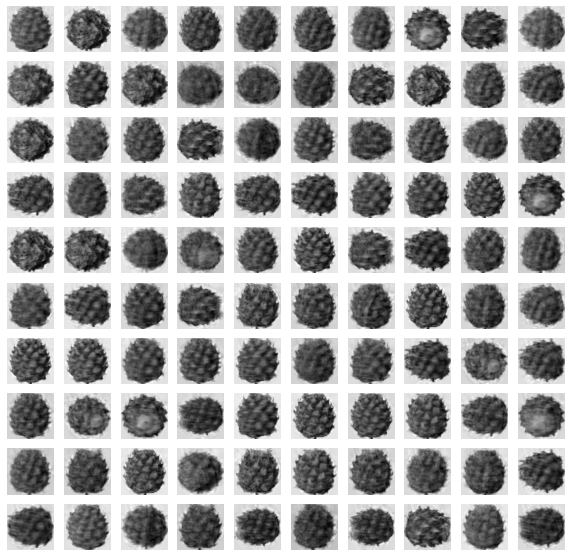

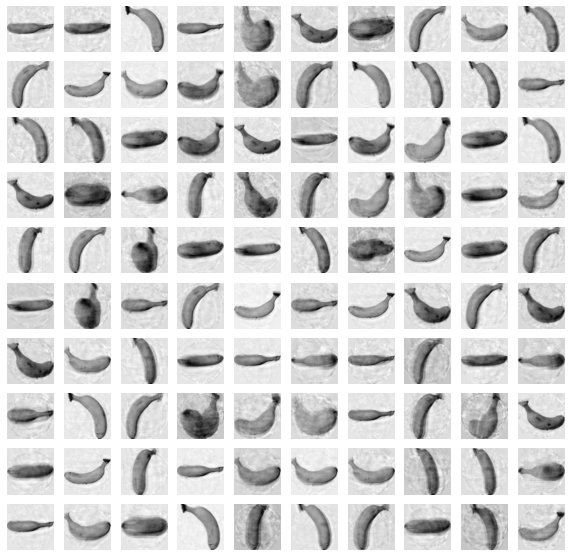

In [4]:
# 재구성 (축소 -> 복원)
# 원본 데이터 10000개 특성을 50개로 축소
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape # (300, 50)

# 50 주성분을 10000개로 복원
fruits_inverse = pca.inverse_transform(fruits_pca)
fruits_inverse.shape #(300, 10000)

# 복원된 이미지 출력
fruits_reconstuct  = fruits_inverse.reshape(-1,100,100)
for i in [0,100,200]:
  draw_fruits(fruits_reconstuct[i:i+100])
  "\n"


# 복원해도 원본 데이터 특성을 그대로 가지고 있음 

### 설명된 분산(explained variance)
- 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값을 `explained variance`이라고 함
- explained variance ratio 속성에 각 주성분의 설명된 분산 비율이 저장
- 당연히 첫번째 주성분의 설명된 분산이 가장 큼
- 이 분산 비율을 모두더하면 50개 주성분으로 표현하고 있는 충 분산의 비율

0.9215237379136235


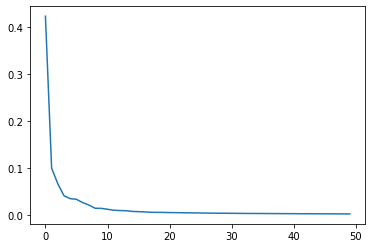

In [5]:
print(np.sum(pca.explained_variance_ratio_))

plt.plot(pca.explained_variance_ratio_)
plt.show()

# 훈련데이터 있는 분산에 92% 유지
# 50개 특성에서 원본 데이터 복원해 이미지 출력시 품질이 좋은 이유 - 주성분 분산비율이 높으니까
# 설명된 분선의 비율을 그래프로 그려보면 적절한 주성분의 개수를 찾을 수 있음
# 처음 10개 정도의 주성분이 대부분의 분산을 표현하고 있음

### 로지스틱회귀 분류와 PCA

In [6]:
# 로지스틱회귀 분류와 PCA
# 성능 비교
  # 원본 데이터와 PCA로 차원 축소된 데이터를 사용하여 지도 학습 모델(로지스틱 회귀)훈련을 통해 비교

# import numpy as np
# fruits = np.load("data/fruits_300.npy")
# fruits_2d = fruits.reshape(-1, 100*100)

# from sklearn.decomposition import PCA
# pca = PCA(n_components=50) # 100*100 차원에서 주성분 개수 50개
# pca.fit(fruits_2d)

# pca fit 시킨걸 transform 시켜줌
fruits_pca = pca.transform(fruits_2d)
fruits_pca

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

lr = LogisticRegression()
target = np.array([0]*100 + [1]*100 + [2]*100)

# 원본 데이터 10000개로 분류 모댈
scores  = cross_validate(lr, fruits_2d, target) # 교차 검증 - test 데이터 -> 모델, fearture, target
print(f"원본 데이터 평가점수 {np.mean(scores['test_score'])}")
print(f"원본 데이터 분류시간 {np.mean(scores['fit_time'])}")

# 차원 축소한 데이터 50개로 분류 
scores = cross_validate(lr, fruits_pca, target)
print(f"pca 데이터 평가점수 {np.mean(scores['test_score'])}")
print(f"pca 데이터 분류시간 {np.mean(scores['fit_time'])}")


원본 데이터 평가점수 0.9966666666666667
원본 데이터 분류시간 0.7765988349914551
pca 데이터 평가점수 1.0
pca 데이터 분류시간 0.058199501037597655


In [7]:
from sklearn.decomposition import PCA

# 이전 주성분 개수는 50 -> explained cariance 비율도 가능
print(np.sum(pca.explained_variance_ratio_))

# 설명된 분산이 0.5개 되는 주성분 찾기
pca = PCA(n_components = 0.5)
pca.fit(fruits_2d)
print(pca.n_components_) # 2 -> 주성분 2개면 50% 분산 설명 가능

# 원본 데이터 pca 모델-2개로 변환
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape # (300, 2)

# 특성 2개로만 사용한 pca에 로지ㄴㅁ스틱 교차검증
scores = cross_validate(lr, fruits_pca, target)
print(f"pca(주성분 2개) 데이터 평가점수 {np.mean(scores['test_score'])}")
print(f"pca(주성분 2개) 데이터 분류시간 {np.mean(scores['fit_time'])}")


0.9215237379136235
2


C:\Users\nono\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\nono\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

pca(주성분 2개) 데이터 평가점수 0.99
pca(주성분 2개) 데이터 분류시간 0.08380284309387206


C:\Users\nono\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### K-means와 PCA

(300, 2)


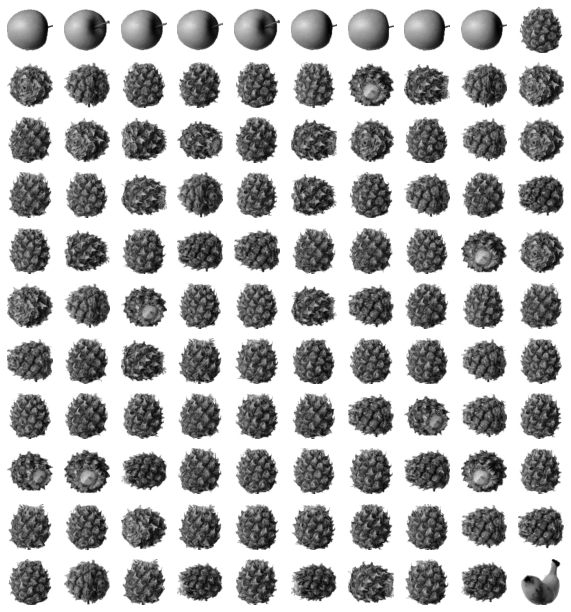

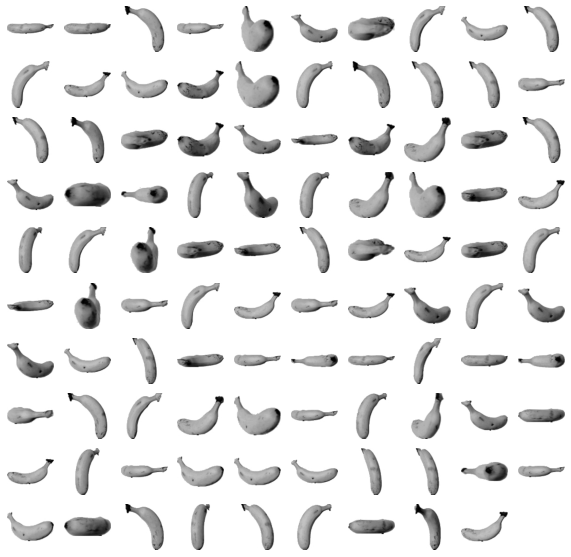

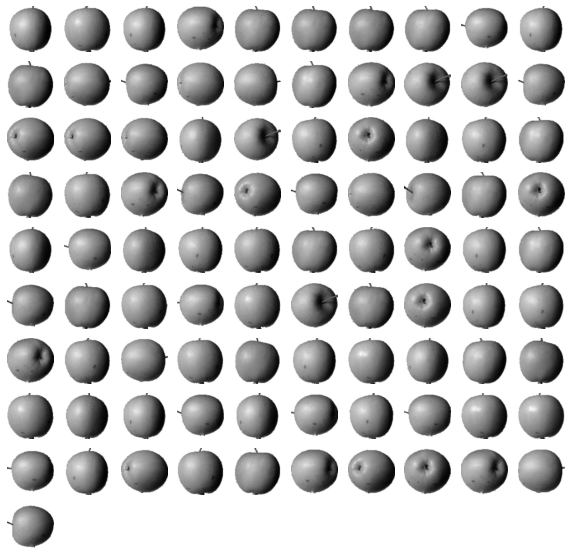

In [8]:
# 차원축소된 데이터를 사용해 K-means 알고리즘과 클러스터
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)

pca = PCA(n_components=0.5)
fruits_pca = pca.fit_transform(fruits_2d)
print(fruits_pca.shape)

km.fit(fruits_pca)
np.unique(km.labels_, return_counts = True) # (array([0, 1, 2]), array([110,  99,  91], dtype=int64))

# 사진 조지기
for i in range(3):
  draw_fruits(fruits[km.labels_ == i])

  # 2개 특성으로 원본으로 군집한거랑 동일
  # 사과랑 바나나는 정확인데 파인애플은 사과랑 혼돈


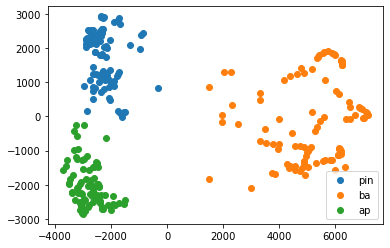

In [9]:
# 시각화
# 훈련 데이터 차원을 줄이면서 또하나의 얻을 수 있는 장점이 시각화임
# 2차원, 3차원으로 줄이면 화면에 출력 쌉가능
# fruits_pca 데이터는 2개의 특성이 있기 때문에 2차원으로 쌉가능

# km 라벨이 3개 인데 라벨값 다 넣어주기
# for i in range(3):
#   data0 = fruits_pca[km.labels_ == 0]
#   data1 = fruits_pca[km.labels_ == 1]
#   data2 = fruits_pca[km.labels_ == 2]

# 그래프
import matplotlib.pyplot as plt

# plt.scatter(data0[:,0], data0[:,1])
# plt.scatter(data1[:,0], data1[:,1])
# plt.scatter(data2[:,0], data2[:,1])
# plt.show()

# for 돌면서 레이블 0,1,2 그래프 그려주기
for i  in range(3):
  data = fruits_pca[km.labels_ == i]
  plt.scatter(data[:,0], data[:,1])
plt.legend(['pin','ba','ap'])

# 사과랑 파인애플 경계가 가까워서 혼동
# 산점도 구분 굿굿
# 2개의 특성인데 교차검증 99%

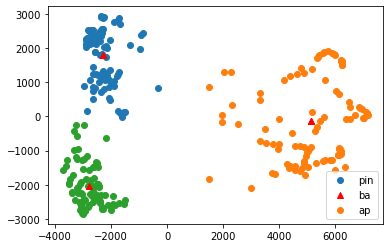

In [10]:
#  센터 점 찍기

center = km.cluster_centers_

for i  in range(3):
  data = fruits_pca[km.labels_ == i]
  center = km.cluster_centers_
  plt.scatter(data[:,0], data[:,1])
  plt.scatter(center[:,0], center[:,1], c='red', marker='^')
plt.legend(['pin','ba','ap'])